In [1]:
%matplotlib notebook
from matplotlib import pyplot as plt

In [2]:
# integer vertices of a dodecahedron which lie on a sphere of integer radius:
iverts = [[ 1840720,  1798335,        0],
       [ 2573375,        0,        0],
       [  773500,  1963500, -1472625],
       [  773500,  1963500,  1472625],
       [  794070,   323510, -2426325],
       [  794070,   323510,  2426325],
       [  905828, -2223396,  -926415],
       [  905828, -2223396,   926415],
       [ 1925420,  -863940, -1472625],
       [ 1925420,  -863940,  1472625],
       [-1840720, -1798335,        0],
       [-2573375,        0,        0],
       [ -773500, -1963500,  1472625],
       [ -773500, -1963500, -1472625],
       [ -794070,  -323510,  2426325],
       [ -794070,  -323510, -2426325],
       [ -905828,  2223396,   926415],
       [ -905828,  2223396,  -926415],
       [-1925420,   863940,  1472625],
       [-1925420,   863940, -1472625]]

In [3]:
# these should all be zero:
[sum([j*j for j in i]) - 2573375 ** 2 for i in iverts]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [4]:
faces = [[3,16,18,14,5], [0,3,5,9,1], [0,1,8,4,2], [0,2,17,16,3],
 [1,9,7,6,8], [5,14,12,7,9], [2,4,15,19,17], [10,11,19,15,13],
 [4,8,6,13,15], [6,7,12,10,13], [11,18,16,17,19], [10,12,14,18,11]]

In [5]:
edges = [[i,j] for i in range(20) for j in range(i) if (2 == len([f for f in faces if ((i in f) and (j in f))]))]
len(edges)

30

In [6]:
def det4(x):
    acc = 0
    for i in range(4):
        acc += x[i][0] * x[1^i][1] * x[2^i][2] * x[3^i][3]
        acc -= x[i][0] * x[2^i][1] * x[1^i][2] * x[3^i][3]
        acc += x[i][0] * x[2^i][1] * x[3^i][2] * x[1^i][3]
        acc -= x[i][0] * x[3^i][1] * x[2^i][2] * x[1^i][3]
        acc += x[i][0] * x[3^i][1] * x[1^i][2] * x[2^i][3]
        acc -= x[i][0] * x[1^i][1] * x[3^i][2] * x[2^i][3]
    return acc

In [7]:
# these should all be zero:
[[det4([[1] + iverts[x] for (j, x) in enumerate(f) if (i != j)]) for i in range(5)] for f in faces]

[[0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0],
 [0, 0, 0, 0, 0]]

In [8]:
import numpy as np
verts = np.array(iverts, dtype=float) / 2573375.0

<IPython.core.display.Javascript object>


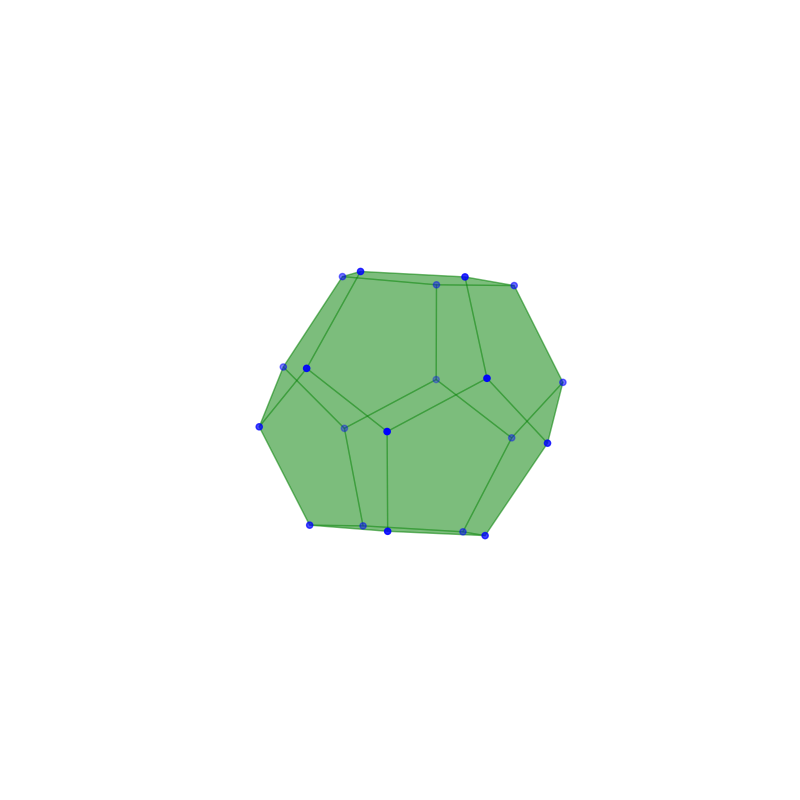

(-1.1, 1.1, -0.9572, 1.0932)

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import mpl_toolkits.mplot3d as a3

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

ax.add_collection3d(a3.art3d.Poly3DCollection([verts[np.array(f)] for f in faces],
                                              alpha=0.3, color='g', facecolors='w', linewidths=1))

ax.scatter(verts[:,0], verts[:,1], verts[:,2], color='b')

# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

plt.axis('off')

<IPython.core.display.Javascript object>


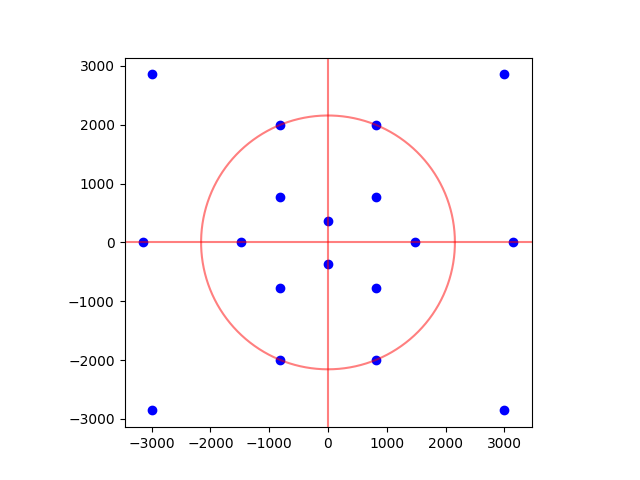

In [10]:
plt.figure()

plt.plot(np.sqrt(814**2 + 1998**2) * np.cos(np.linspace(0, 2 * np.pi, 1000)),
         np.sqrt(814**2 + 1998**2) * np.sin(np.linspace(0, 2 * np.pi, 1000)),
         color='red', alpha=0.5)

plt.axvline(0.0, color='red', alpha=0.5)
plt.axhline(0.0, color='red', alpha=0.5)

plt.scatter(*zip(*[(0, 370), (0, -370),
                   (814, 777), (814, -777), (-814, -777), (-814, 777),
                   (814, 1998), (814, -1998), (-814, -1998), (-814, 1998),
                   (1480, 0), (-1480, 0), (3145, 0), (-3145, 0),
                   (2992, 2856), (2992, -2856), (-2992, -2856), (-2992, 2856)]), color='blue')

plt.gca().set_aspect(1.0)